# 🧬 Analyze scFoundation Embeddings

In this notebook, we load and explore the scFoundation bulk embeddings to understand their structure, distribution, and variation before applying dimensionality reduction (PCA).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pandas as pd


## 📥 Load and Inspect Embeddings

Let's load the `.npy` file containing scFoundation embeddings and look at its basic properties.


In [2]:
# Load embeddings
embedding_path = "../../data/embeddings/bulk_embeddings.npy"  # Replace with your actual path
emb = np.load(embedding_path)

print("✅ Embedding matrix loaded")
print("Shape:", emb.shape)
print("First 3 samples:\n", emb[:3, :5])


✅ Embedding matrix loaded
Shape: (1431, 3072)
First 3 samples:
 [[-0.58174574  2.8207555   0.39019117  0.98488915 -1.2866821 ]
 [-0.7839675   2.6295755   0.43143788  1.1452618  -1.1227732 ]
 [-0.95193195  2.663417    0.68790853  1.3054265  -1.3669015 ]]


## 📊 Basic Embedding Statistics

Let's check the distribution of embedding norms and per-dimension statistics.


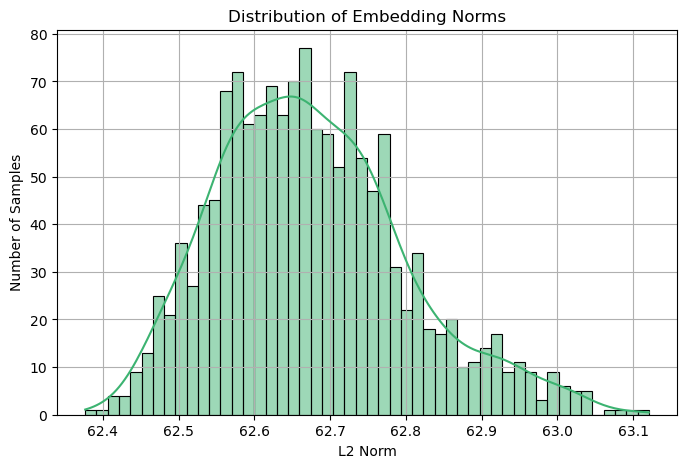

In [3]:
# Embedding norms
norms = np.linalg.norm(emb, axis=1)

plt.figure(figsize=(8, 5))
sns.histplot(norms, bins=50, kde=True, color="mediumseagreen")
plt.title("Distribution of Embedding Norms")
plt.xlabel("L2 Norm")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.show()


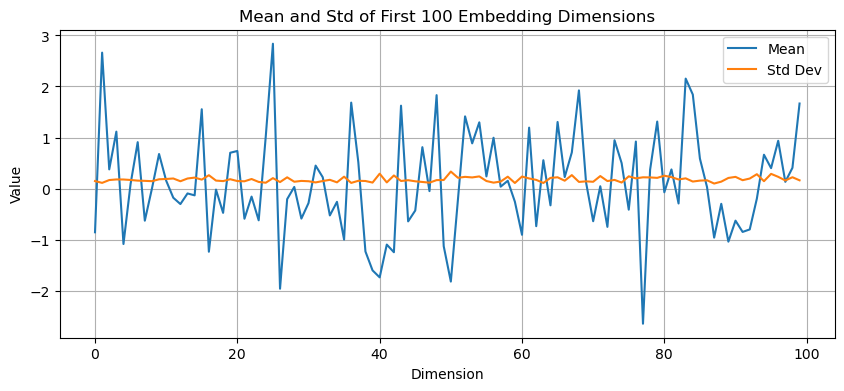

In [4]:
mean_vals = emb.mean(axis=0)
std_vals = emb.std(axis=0)

plt.figure(figsize=(10, 4))
plt.plot(mean_vals[:100], label="Mean")
plt.plot(std_vals[:100], label="Std Dev")
plt.title("Mean and Std of First 100 Embedding Dimensions")
plt.xlabel("Dimension")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


## 🌀 Optional: Visualize Embeddings with t-SNE

We'll use t-SNE to visualize global structure in 2D.


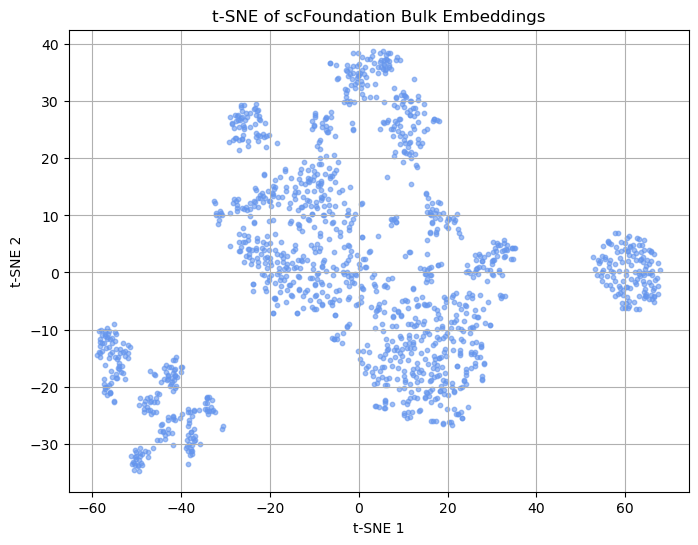

In [5]:
# Scale embeddings
X_scaled = StandardScaler().fit_transform(emb)

# t-SNE projection
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=10, alpha=0.6, color="cornflowerblue")
plt.title("t-SNE of scFoundation Bulk Embeddings")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.show()


## ✅ Summary and Next Step

The embeddings appear to have consistent structure and variance. We'll now move on to applying PCA in the next notebook.
